# pyspark in a container

original [article](https://levelup.gitconnected.com/using-docker-and-pyspark-134cd4cab867)

- the only thing this adds is docker-compose to make it easy to access the data file

# install some packages

In [1]:
pip install pandas numpy matplotlib pyspark

Note: you may need to restart the kernel to use updated packages.


# unzip the data

In [2]:
!unzip data.zip

Archive:  data.zip
  inflating: Vermont_Vendor_Payments.csv  


# do some stuff with pyspark
- the rest is mostly from the [article](https://levelup.gitconnected.com/using-docker-and-pyspark-134cd4cab867)

In [3]:
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [4]:
spark

In [5]:
df = spark.read.csv('Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [6]:
df

DataFrame[Quarter Ending: string, Department: string, UnitNo: int, Vendor Number: string, Vendor: string, City: string, State: string, DeptID Description: string, DeptID: string, Amount: double, Account: string, AcctNo: string, Fund Description: string, Fund: string]

In [7]:
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [8]:
print('The total number of rows is:', df.count(), '\nThe total number of columns is:', len(df.columns))

The total number of rows is: 1714538 
The total number of columns is: 14


In [9]:
df.show()

+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|        City|State|  DeptID Description|    DeptID|   Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|    12/31/2019|Vt Housing & Cons...|  9150|   0000002188|Vermont Housing &...|  Montpelier|   VT|               Trust|9150120000|1075000.0|Transfer Out - Co...|720010|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150|   0000375660|Wagner Developmen...| Brattleboro|   VT|             VT REDI|9150293000|   4612.5|Other Direct Gran...|552990|Housing & Conserv...|90610|
|    12/31/2019|Vt H

In [10]:
df.createOrReplaceTempView('VermontVendor')

q = '''SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor LIMIT 10'''

def qry(q):
    return spark.sql(q).show()

qry(q)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|    12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|    12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|    12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|    12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|    12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|    12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|    12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+--------------+--------------------+---------+-----+



In [11]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|    12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|    12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|    12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|    12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|    12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|    12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|    12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+--------------+--------------------+---------+-----+
only showing top 10 rows



In [12]:
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10
'''
).show()

+--------------+----------+--------+-----+
|Quarter Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    12/31/2012| Education|  302.12|   VT|
|    12/31/2012| Education|531548.0|   VT|
|    12/31/2012| Education| 14082.0|   VT|
|    12/31/2012| Education| 5337.66|   VT|
|    12/31/2012| Education|164436.0|   VT|
|    12/31/2012| Education|  8295.0|   VT|
|    12/31/2012| Education|   646.5|   VT|
|    12/31/2012| Education|    29.9|   VT|
|    12/31/2012| Education| 34159.0|   VT|
|    12/31/2012| Education|  2626.0|   VT|
+--------------+----------+--------+-----+



In [13]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Education').show(10)

+--------------+----------+--------+-----+
|Quarter Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    12/31/2012| Education|  302.12|   VT|
|    12/31/2012| Education|531548.0|   VT|
|    12/31/2012| Education| 14082.0|   VT|
|    12/31/2012| Education| 5337.66|   VT|
|    12/31/2012| Education|164436.0|   VT|
|    12/31/2012| Education|  8295.0|   VT|
|    12/31/2012| Education|   646.5|   VT|
|    12/31/2012| Education|    29.9|   VT|
|    12/31/2012| Education| 34159.0|   VT|
|    12/31/2012| Education|  2626.0|   VT|
+--------------+----------+--------+-----+
only showing top 10 rows



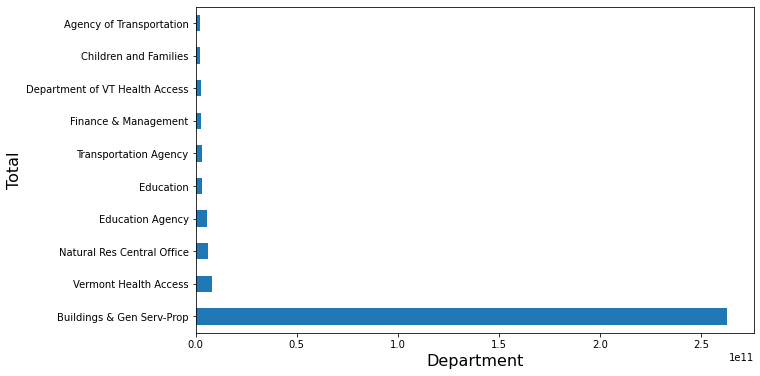

In [14]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


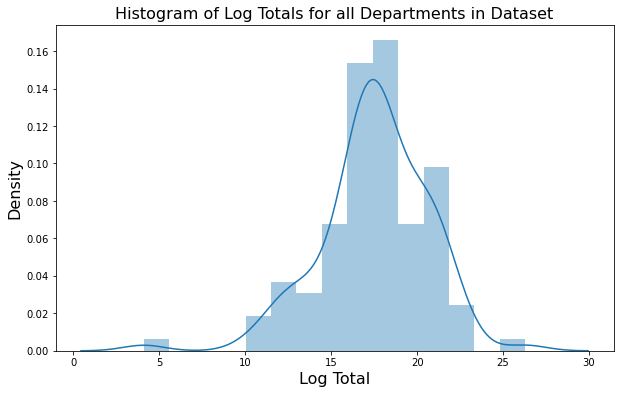

In [15]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
    '''
    SELECT Department, SUM(Amount) as Total FROM VermontVendor 
    GROUP BY Department
    '''
    ).toPandas()

plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.savefig('distplot.png')
plt.show()